In [1]:
TEST = False

WHERE_PLACE = "kaggle" #The WHERE_PLACE variable must have the following value:"local","kaggle","colab"

Phase_1 = False
Phase_2 = False
NAME_OUTPUT_FILE = 'TPSA_A_LGBM-tuning(v42)'
NAME_OUTPUT_FOR_STAKING = 'LGBM_probs_for_staking(v42)'
NAME_OUTPUT_FOR_STAKING_TEST = 'LGBM_probs_test_for_staking(v42)'
TARGET = 'Survived'
INDEX_COL = 'PassengerId'

import numpy as np
# Range of values for selection in phase 1 :
N_ESTIMATORS_RANG = [200000] #[5000] #list(range(4000,5000,100)) # 
RANG_LEARNING_RATE = list(np.arange(0.000005,0.00004,0.000005)) #[ 0.002] # list(np.arange(0.001,0.1,0.001))  
threshold = 0.47231523177731743

CV =  10 # 5
CV_O =  10 # 
TEST_SIZE = 0.2

N_TRIALS = 100
SEED = 2599999
GPU = False

SELECT_PRED = False
SELECT_PRED2 = False

# ------------------------------------------------------------------------------
# Path definition
# ------------------------------------------------------------------------------
from pathlib import Path
DATA_PATH_Kaggle = Path("../input/tabular-playground-series-apr-2021")
DATA_PATH_Colab = Path("/content/drive/My Drive/Colab Notebooks/TB2")
LOG_PATH = Path("./log/")
NAME_RUN_LOG = 'Run__Logs.log'

In [2]:
(len(N_ESTIMATORS_RANG)*len(RANG_LEARNING_RATE))*CV

70

params = {
    'n_estimators': 200000, # 5000,
    'learning_rate': 0.00004, # 0.002,
    'num_leaves': 246, 
    'max_bin': 631, 
    'min_child_samples': 287, 
    'min_sum_hessian_in_leaf': 36.23686299058342, 
    'bagging_fraction': 0.9663000952102834, 
    'feature_fraction': 0.5588941289441328, 
    'bagging_freq': 51, 
    'reg_alpha': 10.794311547009851, 
    'reg_lambda': 0.5872293349946798
}

In [3]:
####### Берем полученные наилучшие значения гиперпараметров с прошлых итераций
####### Значения получены за несколько полных прогонов в ноутбуке - lightgbm_tuning_2K_W_UN7 :
params = {
    'n_estimators': 20000, # 5000,
    'learning_rate': 0.0004, # 0.002,
    'num_leaves': 246, 
    'max_bin': 631, 
    'min_child_samples': 287, 
    'min_sum_hessian_in_leaf': 36.23686299058342, 
    'bagging_fraction': 0.9663000952102834, 
    'feature_fraction': 0.5588941289441328, 
    'bagging_freq': 51, 
    'reg_alpha': 10.794311547009851, 
    'reg_lambda': 0.5872293349946798
}

len(RANG_LEARNING_RATE),  RANG_LEARNING_RATE

####### Берем полученные наилучшие значения гиперпараметров с прошлых итераций
####### Значения получены за несколько полных прогонов в ноутбуке - lightgbm_tuning_2K_W_UN7 :
params = {
    'n_estimators': 300000, #100000, #200000, # 5000,
    'learning_rate': 1e-05,# 3.999999999999999e-05, #0.00004, # 0.002,
    'num_leaves': 246, 
    'max_bin': 631, 
    'min_child_samples': 287, 
    'min_sum_hessian_in_leaf': 36.23686299058342, 
    'bagging_fraction': 0.9663000952102834, 
    'feature_fraction': 0.5588941289441328, 
    'bagging_freq': 51, 
    'reg_alpha': 10.794311547009851, 
    'reg_lambda': 0.5872293349946798
}

####### Берем полученные наилучшие значения гиперпараметров с прошлых итераций
####### Значения получены за несколько полных прогонов в ноутбуке - lightgbm_tuning_2K_W_UN7 :
params = {
    'n_estimators': 20000, # 5000,
    'learning_rate': 0.0004, # 0.002,
    'num_leaves': 246, 
    'max_bin': 631, 
    'min_child_samples': 287, 
    'min_sum_hessian_in_leaf': 36.23686299058342, 
    'bagging_fraction': 0.9663000952102834, 
    'feature_fraction': 0.5588941289441328, 
    'bagging_freq': 51, 
    'reg_alpha': 10.794311547009851, 
    'reg_lambda': 0.5872293349946798
}

In [4]:
from time import time
import datetime
start_time = time()

if TEST:
    params.update({'n_estimators': 5})
    NAME_OUTPUT_FILE = '_TEST_' + NAME_OUTPUT_FILE + '_TEST_'
    print('**************************************************************')
    print('*** TEST mode ***')
    print('**************************************************************')
    
if WHERE_PLACE == "local":
    input_path = Path('Data')
    d_ext = 'csv'
    print("LOCAL")
elif  WHERE_PLACE == "kaggle":
    input_path = DATA_PATH_Kaggle
    d_ext = 'csv'
    print("KAGGLE")
elif  WHERE_PLACE == "colab":
    from google.colab import drive
    drive.mount('/content/drive/')
    #!ls -al "/content/drive/My Drive/Colab Notebooks/TB1"
    input_path = DATA_PATH_Colab
    d_ext = 'dcv'
    !pip install catboost
    !pip install optuna
    !pip install category_encoders
    print("Google Colab")
else:
    raise Exception('the WHERE_PLACE variable must have the following value: "local, kaggle, colab".')
    
if GPU:
    params['device'] = 'gpu'
    params['gpu_platform_id'] = 0
    params['gpu_device_id'] = 0
   ### !pip uninstall lightgbm -y
    # install lightgbm GPU
  ###  !pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
    
LOG_PATH.mkdir(parents=True, exist_ok=True)
with open(NAME_RUN_LOG, 'at', encoding='utf-8') as logfile:
    print('\n\n***********************\n***********************', 
          file=logfile)
    print('Время старта скрипта: {}'.format(datetime.datetime.now().strftime("%d-%m-%Y %H:%M")), 
          file=logfile)
print('Время старта скрипта: {}'.format(datetime.datetime.now().strftime("%d-%m-%Y %H:%M")))
    
params

KAGGLE
Время старта скрипта: 22-04-2021 11:14


{'n_estimators': 20000,
 'learning_rate': 0.0004,
 'num_leaves': 246,
 'max_bin': 631,
 'min_child_samples': 287,
 'min_sum_hessian_in_leaf': 36.23686299058342,
 'bagging_fraction': 0.9663000952102834,
 'feature_fraction': 0.5588941289441328,
 'bagging_freq': 51,
 'reg_alpha': 10.794311547009851,
 'reg_lambda': 0.5872293349946798}

In [5]:
# загружаем необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score
import optuna
from optuna.samplers import RandomSampler
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntUniformDistribution, UniformDistribution
# импортируем класс StandardScaler, позволяющий
# выполнить стандартизацию
from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders import TargetEncoder, OrdinalEncoder, LeaveOneOutEncoder

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

# импортируем библиотеку seaborn для нашей 
# функции diagnostics_skewness()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# импортируем модули norm и stats библиотеки scipy для
# построения гистограмм и графиков квантиль-квантиль
from scipy.stats import norm
from scipy import stats

from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
import matplotlib.pyplot as plt

In [6]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 60)
# загружаем набор
data =  pd.read_csv(input_path / ('train.' + d_ext), index_col=INDEX_COL)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


In [7]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [8]:
# смотрим еще по другому наличие пропусков
print(data.isnull().sum())

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64


In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [10]:
if TEST:
    data = data[:5000]
    print("TEST MODE, Data shape = ",data.shape)

In [11]:
data[TARGET].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

In [12]:
# Смотрим на количество уникальных значений для категориальных столбцов
data[data.dtypes[data.dtypes == 'object'].index].nunique().sort_values(ascending=False)

Name        92144
Ticket      75331
Cabin       26992
Embarked        3
Sex             2
dtype: int64

In [13]:
# Смотрим на количество уникальных значений для численных столбцов
data[data.dtypes[data.dtypes != 'object'].index].nunique().sort_values(ascending=False)

Fare        15935
Age           173
Parch           8
SibSp           7
Pclass          3
Survived        2
dtype: int64

In [14]:
# смотрим частоты категорий ( переменных c типом 'object' )
for col in data.dtypes[data.dtypes == 'object'].index:
    print(data[col].value_counts(dropna=False))

Johnson, John         31
Smith, James          24
Smith, John           24
Johnson, William      22
Smith, Michael        20
                      ..
Hinson, Irene          1
Tinsley, Susan         1
Sledge, Gary           1
Phillips, Benjamin     1
Vedder, Trey           1
Name: Name, Length: 92144, dtype: int64
male      56114
female    43886
Name: Sex, dtype: int64
NaN              4623
A/5               602
C.A.              177
SC/PARIS          145
SOTON/O.Q.         80
                 ... 
326248              1
32944               1
46023               1
STON/O 432207       1
W./C. 326044        1
Name: Ticket, Length: 75332, dtype: int64
NaN       67866
C19828        6
C11283        5
B11110        5
C13699        5
          ...  
C3851         1
A3420         1
E16183        1
D14693        1
A14341        1
Name: Cabin, Length: 26993, dtype: int64
S      72139
C      22187
Q       5424
NaN      250
Name: Embarked, dtype: int64


# смотрим дублирующие наблюдения:
display(data[data.duplicated(keep=False)])

#удаляем дубли на месте, оставляя первое встретившееся наблюдение:
data = data.drop_duplicates(subset=None,keep='first')

# смотрим снова дублирующие наблюдения:
data[data.duplicated(keep=False)]

In [15]:
# смотрим частоты числовых значений
for col in data.dtypes[data.dtypes != 'object'].index:
    print(data[col].value_counts(dropna=False))

0    57226
1    42774
Name: Survived, dtype: int64
3    41006
1    30315
2    28679
Name: Pclass, dtype: int64
NaN     3292
25.0    2354
23.0    2345
26.0    2320
24.0    2298
        ... 
78.5       1
80.5       1
14.5       1
13.5       1
87.0       1
Name: Age, Length: 174, dtype: int64
0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64
0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64
NaN       134
9.85       87
9.27       87
9.79       86
9.20       85
         ... 
142.19      1
161.04      1
290.84      1
217.63      1
55.06       1
Name: Fare, Length: 15936, dtype: int64


In [16]:
# смотрим еще наличие пропусков
print(data.isnull().sum())

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64


# Оценим графически распределение переменных :

In [17]:
# функция, которая строит гистограммы
# распределения и графики квантиль-квантиль
def plot_hist(df):
    # создаем копию датафрейма
    df_ = df.copy()
    # отбираем столбцы, у которых больше 3 уникальных значений
    df_ = df_.loc[:, df.apply(pd.Series.nunique) > 3]
    # из этих столбцов отбираем только количественные
    #num_cols = df_.select_dtypes(include=['number']).columns
    #num_cols = df_.select_dtypes(exclude='object').columns.tolist()
    num_cols = df_.dtypes[data.dtypes != 'object'].index.tolist()
    for col in num_cols:
        df_[col].fillna(df_[col].median(), inplace=True)
        # строим гистограмму
        sns.distplot(df_[col], fit=norm)
        fig = plt.figure();
        # строим график квантиль-квантиль
        stats.probplot(df_[col], plot=plt)
        fig = plt.figure();

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

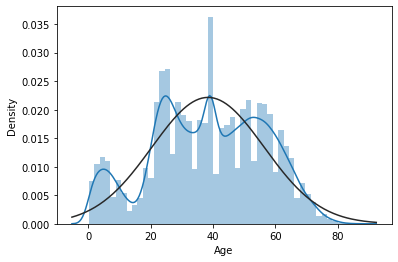

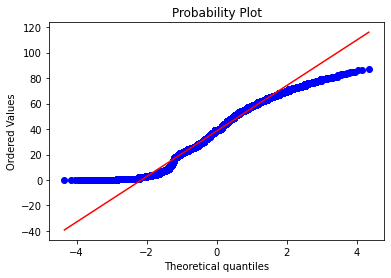

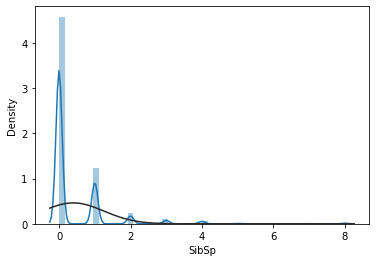

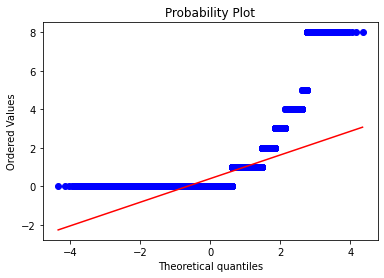

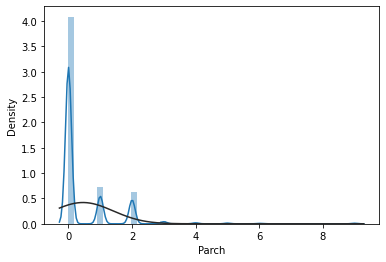

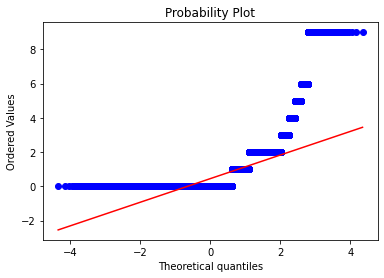

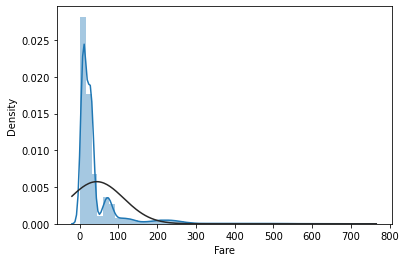

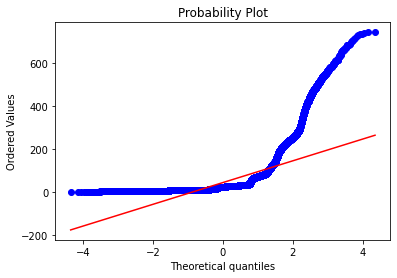

<Figure size 432x288 with 0 Axes>

In [18]:
# применяем функцию plot_hist()
plot_hist(data)

In [19]:
# загружаем тестовый  набор
test_o =  pd.read_csv(input_path / ('test.' + d_ext), index_col=INDEX_COL)
# If selection of predictors
if SELECT_PRED or SELECT_PRED2:
    test_o = test[SELECTED_FEATURES]

In [20]:
# Удаление бесполезных переменных
data = data.drop('Name',axis=1)
test_o = test_o.drop('Name',axis=1)

data.columns, test_o.columns

(Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
        'Embarked'],
       dtype='object'))

# Конструирование признаков которое можно делать до разбиения на  train/test

In [21]:
############## ref.: https://www.kaggle.com/jmargni/tps-apr-2021-lightgbm-cv
############## https://www.kaggle.com/alexryzhkov/n3-tps-april-21-lightautoml-starter?scriptVersionId=59046001

def create_extra_features(data):
    # Age fillna with mean age for each class
    age_map = data[['Age', 'Pclass']].dropna().groupby('Pclass').mean().to_dict()
    data.Age = data.Age.fillna(data.Pclass.map(age_map['Age']))

    # Cabin, fillna with 'X' and take first letter
    data.Cabin = data.Cabin.map(lambda x: str(x)[0].strip())

    # Ticket, fillna with 'X', split string and take first split 
    data.Ticket = data.Ticket.map(lambda x:str(x).split()[0] if len(str(x).split()) > 1 else 'X')

    # Fare, fillna with mean value
    # (THE ONLY FILLNA LEFT BECAUSE HERE WE USE TEST DATASET - LightAutoML can't do it in real life because of strict distinction between train and test stages)
    data.Fare = data.Fare.fillna(data.Fare.mean())

    # Embarked, fillna with 'X' value
    all_df.Embarked = all_df.Embarked.fillna('X')

    # Name, take only surnames
    #data.Name = data.Name.map(lambda x: str(x).split(',')[0])
    return data


all_df = pd.concat([data, test_o]).reset_index(drop = True)
all_df = create_extra_features(all_df)
data, test_o = all_df[:len(data)], all_df[len(data):]
print(data.shape, test_o.shape)

test_o = test_o.drop('Survived',axis=1) 

(100000, 10) (100000, 10)


In [22]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1,male,40.672757,2,0,X,27.14,C,S
1,0.0,3,male,30.205570,0,0,X,13.35,n,S
2,0.0,3,male,0.330000,1,2,CA,71.29,n,S
3,0.0,3,male,19.000000,0,0,A.,13.04,n,S
4,1.0,3,male,25.000000,0,0,X,7.76,n,S
...,...,...,...,...,...,...,...,...,...,...
99995,1.0,2,female,62.000000,0,0,PC,14.86,D,C
99996,0.0,2,male,66.000000,0,0,X,11.15,n,S
99997,0.0,3,male,37.000000,0,0,X,9.95,n,S
99998,0.0,3,male,51.000000,0,1,X,30.92,n,S


In [23]:
# selection of predictors
if SELECT_PRED:
    # Separately, we selected the significant priediktors
    # https://www.kaggle.com/c/tabular-playground-series-mar-2021/discussion/224530
    # Variant 1:
    SELECTED_FEATURES = [ # Noisy Cat Variables - 'cat5', 'cat7', 'cat8', 'cat10'
                        'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 
                        #'cat5', 
                        'cat6', 
                        #'cat7', 'cat8', 
                        'cat9', 
                        #'cat10', 
                        'cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18','cont0','cont1','cont2','cont3', 
                        'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10']

# selection of predictors
if SELECT_PRED2:
    # Separately, we selected the significant priediktors by the BoostARoota method
    # Here they are, Variant 2 :
    SELECTED_FEATURES = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 
                         'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 
                        #'cont4',
                         'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10']
    
if SELECT_PRED or SELECT_PRED2:
    selfeat = SELECTED_FEATURES.copy()
    selfeat.append(TARGET)
    data = data[selfeat]
    print(data.shape)

In [24]:
# создаем обучающий массив признаков, обучающий массив меток,
# тестовый массив признаков, тестовый массив меток
train, test, y_train, y_test = train_test_split(data.drop(TARGET, axis=1), 
                                                data[TARGET], 
                                                test_size=TEST_SIZE, 
                                                stratify=data[TARGET], 
                                                random_state=SEED)

In [25]:
# создаем список количественных признаков
num_columns = train.select_dtypes(exclude='object').columns.tolist()
# создаем списки категориальных признаков
cat_columns = data.select_dtypes(include='object').columns

# записываем список индексов категориальных предикторов
cat_features_idx = np.where(data.dtypes == 'object')[0].tolist()
# выводим этот список
cat_features_idx

[2, 6, 8, 9]

> # ********  Phase 1 *************

In [26]:
# создаем конвейеры
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('enc', TargetEncoder() ) ])
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scal', None)]
) # 

In [27]:
# создаем список трехэлементных кортежей, в котором
# первый элемент кортежа - название конвейера с
# преобразованиями для определенного типа признаков
transformers = [('num', num_pipe, num_columns),
                ('cat', cat_pipe, cat_columns)]

# передаем список трансформеров в ColumnTransformer
transformer = ColumnTransformer(transformers=transformers)

In [28]:
if Phase_1:
    params2 = params   
    # задаем итоговый конвейер
    ml_pipe = Pipeline([('tr', transformer), 
                        ('lgboost', LGBMClassifier(**params))])

In [29]:
if Phase_1:
    # задаем сетку гиперпараметров
    param_grid = [{
        'tr__cat__imputer__strategy': ['most_frequent',  'constant'],
        'tr__cat__enc': [TargetEncoder(),
                         #LabelEncoder(), 
                         OrdinalEncoder(),
                         #OneHotEncoder(sparse=False, handle_unknown='ignore'),
                         LeaveOneOutEncoder()
                        ],
        'tr__num__imputer__strategy': ['mean', 'median', 'constant'],
        'tr__num__scal': [None], # StandardScaler()],
        'lgboost__learning_rate': RANG_LEARNING_RATE,
        'lgboost__n_estimators' : N_ESTIMATORS_RANG
    }]
    if TEST:
        param_grid = [{
            'lgboost__learning_rate': [0.03,0.02],
            'lgboost__n_estimators' : [5],
                'tr__cat__enc': [OrdinalEncoder()],
        'tr__num__scal': [None], 
        'tr__cat__imputer__strategy': ['most_frequent',  'constant'],
        'tr__num__imputer__strategy': ['mean', 'constant'],
        }]

In [30]:
%%time

if Phase_1:
    # создаем экземпляр класса RandomizedSearchCV или GridSearchCV, передав конвейер,
    # сетку гиперпараметров и указав количество
    # блоков перекрестной проверки, отключив запись метрик 
    # для обучающих блоков перекрестной проверки в атрибут cv_results_
    #gs = GridSearchCV(
    gs = RandomizedSearchCV( 
                      ml_pipe, 
                      param_grid, 
                      cv=CV, 
                      scoring='roc_auc', 
                      n_jobs=-1, 
                      return_train_score=False,
                      verbose=3,
                      random_state=SEED,
                    n_iter = N_TRIALS
                     )
    # выполняем решетчатый поиск
    gs.fit(train, y_train)
    # записываем оптимальные значения гиперпараметров
    OPT_PARAMS_PIPE = gs.best_params_ 

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [31]:
if Phase_1:
    y_probas = gs.predict_proba(test)
    # смотрим наилучшие значения гиперпараметров
    print('Наилучшие значения гиперпараметров: {}'.format(OPT_PARAMS_PIPE))
    # смотрим наилучшее значение AUC
    print('Наилучшее значение AUC: {:.3f}'.format(gs.best_score_))
    # смотрим значение AUC на тестовой выборке
    print('Значение AUC на тестовой выборке: {:.3f}'.format(
        roc_auc_score(y_test, y_probas[:, 1])))

In [32]:
if Phase_1:
    # увеличиваем количество выводимых строк
    pd.set_option('display.max_rows', 300)

    # выводим результаты
    cv_results = pd.DataFrame(gs.cv_results_)[['mean_test_score',
                                               'param_lgboost__learning_rate',
                                               'param_tr__cat__enc',
                                               'param_tr__cat__imputer__strategy',
                                               'param_tr__num__imputer__strategy'
                                               #'param_tr__num__scal'
                                               ]]
    cv_results = cv_results.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)

    for col in cv_results.columns[cv_results.columns.str.contains('enc')]:
        if col in 'mean_test_score':
            continue

        cv_results[col] = cv_results[col].apply(lambda x: type(x).__name__)

    display(cv_results)
    
    with open(NAME_RUN_LOG, 'at', encoding='utf-8') as logfile:
        print('Временная метка окончания ФАЗЫ 1 : {}'.format(datetime.datetime.now().strftime("%d-%m-%Y %H:%M")), 
          file=logfile)
        print('Наилучшие значения гиперпараметров: {}'.format(gs.best_params_), file=logfile)
        print('Наилучшее значение AUC: {:.3f}'.format(gs.best_score_), file=logfile)
        print('Значение AUC на тестовой выборке: {:.3f}'.format(
            roc_auc_score(y_test, gs.predict_proba(test)[:, 1])), file=logfile)
        print('Таблица значений: ', file=logfile)
        #print(display(cv_results), file=logfile)
    with open(NAME_RUN_LOG, 'at', encoding='utf-8') as logfile:
        cv_results.to_csv(NAME_RUN_LOG, index=False, mode='at')

In [33]:
if Phase_1:
    # рисуем ROC кривую 
    skplt.metrics.plot_roc(y_test, y_probas)
    plt.show()

In [34]:
if Phase_1:
    # и выбираем лучшую точку порога
    def Find_Optimal_Cutoff(target, predicted):
        fpr, tpr, threshold = roc_curve(target, predicted)
        i = np.arange(len(tpr)) 
        roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
        roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

        return list(roc_t['threshold']) 

    threshold = Find_Optimal_Cutoff(y_test, y_probas[:, 1])

threshold

0.47231523177731743

> # ********  Phase 2 *************

In [35]:
# трансформеры
upd_cat_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('enc', TargetEncoder())])
upd_num_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), 
        ('scal', None)]) # 

upd_transformers = [('num', upd_num_pipe, num_columns),
                    ('cat', upd_cat_pipe, cat_columns),]

# передаем список трансформеров в ColumnTransformer
upd_transformer = ColumnTransformer(transformers=upd_transformers)

In [36]:
if Phase_2:  
    # задаем итоговый конвейер ПОКА ЧТО С НАЧАЛЬНЫМИ НАСТРОЙКАМИ
    ml_pipe2 = Pipeline([('tr', upd_transformer), 
                         ('lgboost', LGBMClassifier(**params))])

In [37]:
# ml_pipe2.get_params().keys()

In [38]:
if Phase_2:  
    # УСТАНОВКА В НОВЫЙ PIPE НАИЛУЧШИХ ЗНАЧЕНИЙ НАЙДЕННЫХ В ПРЕДЫДУЩЕЙ ФАЗЕ:  
    if Phase_1:  
        # присваиваем итоговому конвейеру оптимальные значения гиперпараметров
        print('Before modification lgboost__learning_rate ml_pipe2: ', ml_pipe2.get_params()['lgboost__learning_rate'])
        ml_pipe2.set_params(**OPT_PARAMS_PIPE)
        print('After modification lgboost__learning_rate ml_pipe2: ', ml_pipe2.get_params()['lgboost__learning_rate'])

In [39]:
if Phase_2:
    # задаем новое пространство поиска
    param_distributions = { # (1) гиперпараметры, задающие структуру дерева:
                       'lgboost__num_leaves': IntUniformDistribution(2, 1024),#  4095),# 131070), #4095),#  (10, 200)
                        #########'lgboost__max_depth': IntUniformDistribution(1, 32) #2, 63 и бесконечное #6, 127),
                       'lgboost__max_bin': IntUniformDistribution(1, 1024),  
                       'lgboost__min_child_samples': IntUniformDistribution(1, 300),
                       'lgboost__min_sum_hessian_in_leaf': UniformDistribution(0.01, 300),#(синонимы:min_child_weight,...)
                        # (2) гиперпараметры, привносящие случайность в ходе построения дерева:
                       'lgboost__bagging_fraction': UniformDistribution(0.0, 1.0),# синонимы:subsample,...
                       'lgboost__feature_fraction': UniformDistribution(0.0, 1.0), # (0.3, 0.9), #синонимы:colsample_bytree,...
                       'lgboost__bagging_freq': IntUniformDistribution(1, 81, 5), # 'синонимы:subsample',...
                        # (3) гиперпараметры, задающие регуляризацию функции потерь:
                        'lgboost__reg_alpha': UniformDistribution(1e-3, 25.0), #0,01 или 0,1
                        'lgboost__reg_lambda': UniformDistribution(1e-3, 25.0), #0,01 или 0,1

                        # ЭТО ТОЛЬКО ДЛЯ БИНАРНОЙ КЛАССИФИКАЦИИ, ДЛЯ НЕСБАЛАНСИРОВАННЫХ КЛАСОВ
                        # sample_pos_weight ~ number of negative samples / number of positive samples
                        # т.е. в данном случае ~ 
                        #'lgboost__scale_pos_weight': UniformDistribution(0.1, 10) #[1, 10000] 


                        # Еще важные гиперпараметры (AG):
                        # min_data_in_leaf
                        # feature_fraction_bynode (синонимы:sub_feature_bynode,colsample_bynode)
                        # min_sum_hessian_in_leaf[0,01,(размер выборки / 1000)](синонимы:min_sum_hessian_per_leaf,min_sum_hessian,min_hessian,min_child_weight)
                        # max_bin_by_feature
                        # min_data_in_bin

    # для категориальных признаков
    #'lgboost__min_data_per_group': IntUniformDistribution(50, 200),
    #'lgboost__cat_smooth': IntUniformDistribution(10, 100) (1.0, 50.0),
    #'lgboost__cat_l2': IntUniformDistribution(1, 20)

    # Рекомендации с https://github.com/Microsoft/LightGBM/issues/695 (от Laurae2 commented on 16 Jul 2017)                   
    # scale_pos_weight: [1, 10000]
    # is_unbalance: false (сделайте свой собственный вес с помощью scale_pos_weight)              
    # subsample: [0.4, 1]
    # bagging_freq: только 1, оставить как есть (в противном случае переоборудование)
    # colsample_bytree: [0,4, 1]
    # вы можете использовать 5, 10, 20, 50, 100 для Early_stopping_rounds.
    # ALL IFO: https://sites.google.com/view/lauraepp/parameters
                      }


    if TEST:
        param_distributions = { # (1) гиперпараметры, задающие структуру дерева: 
                           'lgboost__min_child_samples': IntUniformDistribution(1, 300),
                            # (2) гиперпараметры, привносящие случайность в ходе построения дерева:
                           'lgboost__bagging_fraction': UniformDistribution(0.0, 1.0),# синонимы:subsample,...
                           'lgboost__feature_fraction': UniformDistribution(0.0, 1.0), # (0.3, 0.9), #синонимы:colsample_bytree,...
                           'lgboost__bagging_freq': IntUniformDistribution(1, 81, 5), # 'синонимы:subsample',...
                            # (3) гиперпараметры, задающие регуляризацию функции потерь:
                            'lgboost__reg_alpha': UniformDistribution(1e-3, 25.0), }  

if Phase_2:  
        # задаем новое пространство поиска
    param_distributions = { # (1) гиперпараметры, задающие структуру дерева: 
                           'lgboost__min_child_samples': IntUniformDistribution(1, 300),
        #'lgboost__max_bin',
        
                            # (2) гиперпараметры, привносящие случайность в ходе построения дерева:
                           'lgboost__bagging_fraction': UniformDistribution(0.0, 1.0),# синонимы:subsample,...
                           'lgboost__feature_fraction': UniformDistribution(0.0, 1.0), # (0.3, 0.9), #синонимы:colsample_bytree,...
                           'lgboost__bagging_freq': IntUniformDistribution(1, 81, 5), # 'синонимы:subsample',...
                            # (3) гиперпараметры, задающие регуляризацию функции потерь:
                            'lgboost__reg_alpha': UniformDistribution(1e-3, 25.0), #0,01 или 0,1
                            # ЭТО ТОЛЬКО ДЛЯ БИНАРНОЙ КЛАССИФИКАЦИИ, ДЛЯ НЕСБАЛАНСИРОВАННЫХ КЛАСОВ
                            # sample_pos_weight ~ number of negative samples / number of positive samples
                            # т.е. в данном случае ~ 
                            #'lgboost__scale_pos_weight': UniformDistribution(0.1, 10) #[1, 10000] 
                          }
 
    
    if TEST:
        param_distributions = { # (1) гиперпараметры, задающие структуру дерева: 
                           'lgboost__min_child_samples': IntUniformDistribution(1, 300),
                            # (2) гиперпараметры, привносящие случайность в ходе построения дерева:
                           'lgboost__bagging_fraction': UniformDistribution(0.0, 1.0),# синонимы:subsample,...
                           'lgboost__feature_fraction': UniformDistribution(0.0, 1.0), # (0.3, 0.9), #синонимы:colsample_bytree,...
                           'lgboost__bagging_freq': IntUniformDistribution(1, 81, 5), # 'синонимы:subsample',...
                            # (3) гиперпараметры, задающие регуляризацию функции потерь:
                            'lgboost__reg_alpha': UniformDistribution(1e-3, 25.0), }          

In [40]:
if Phase_2:
    # создаем экземпляр класса OptunaSearchCV
    optuna_search = OptunaSearchCV(
        ml_pipe2,
        param_distributions,
        scoring='roc_auc',
        random_state=SEED,
        n_trials=N_TRIALS,
        #verbose=1,
        cv=CV_O)

In [41]:
%%time
if Phase_2:
    # выполняем оптимизацию
    optuna_search.fit(train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [42]:
if Phase_2:
    # записываем оптимальные значения гиперпараметров optuna
    opt_optuna_params_pipe = optuna_search.best_params_
    if Phase_1:
        opt_optuna_params_pipe['lgboost__learning_rate'] = OPT_PARAMS_PIPE['lgboost__learning_rate']
        opt_optuna_params_pipe['lgboost__n_estimators']  = OPT_PARAMS_PIPE['lgboost__n_estimators']
        
####### !!!!!!!!!!!!!!!!!!!!!!!!!!        opt_optuna_params_pipe['lgboost__n_estimators'] = OPT_PARAMS_PIPE['lgboost__n_estimators'] 

    # печатаем наилучшие значения гиперпараметров
    print('Наилучшие значения гиперпараметров: {}'.format(opt_optuna_params_pipe))
    # печатаем наилучшее значение AUC
    print('Наилучшее значение AUC: {:.3f}'.format(optuna_search.best_score_))
    # смотрим значение AUC на тестовой выборке
    print('AUC на тестовой выборке: {:.3f}'.format(
        roc_auc_score(y_test, optuna_search.predict_proba(test)[:, 1])))
    print('')
    with open(NAME_RUN_LOG, 'at', encoding='utf-8') as logfile:
        print('/nВременная метка окончания ФАЗЫ 2 : {}'.format(datetime.datetime.now().strftime("%d-%m-%Y %H:%M")), 
          file=logfile)
        print('Наилучшие значения гиперпараметров найденых optuna: \n{}'.format(opt_optuna_params_pipe), file=logfile)
        print('Наилучшее значение AUC: {:.3f}'.format(optuna_search.best_score_), file=logfile)
        print('AUC на тестовой выборке: {:.3f}\n'.format(
            roc_auc_score(y_test, optuna_search.predict_proba(test)[:, 1])), file=logfile)

In [43]:
#opt_optuna_params_pipe

> # ********  Phase 3 *************

In [44]:
# формируем массив меток и массив признаков
train = data.drop(TARGET, axis=1)              
Y = data[TARGET] 

In [45]:
#ml_pipe3.get_params()

In [46]:
#  трансформеры - используем ТЕ ЖЕ что и для второй модели
    
# задаем итоговый конвейер ПОКА ЧТО С НАЧАЛЬНЫМИ НАСТРОЙКАМИ
ml_pipe3 = Pipeline([('tr', upd_transformer), 
                     ('lgboost', LGBMClassifier(**params))])

if Phase_2: 
    # Для контроля изменений смотрим выбранные параметры модели 
    opt_par = ['lgboost__n_estimators','lgboost__learning_rate','lgboost__num_leaves']
    print(opt_par)
    print( 'Before modification ml_pipe3: ' ,[ml_pipe3.get_params()[x] for x in opt_par])
    
    # УСТАНОВКА В НОВЫЙ PIPE НАИЛУЧШИХ ЗНАЧЕНИЙ НАЙДЕННЫХ В ПРЕДЫДУЩЕЙ ФАЗЕ:  
    # присваиваем итоговому конвейеру оптимальные значения гиперпараметров найденные optuna
    ml_pipe3.set_params(**opt_optuna_params_pipe)
    
    # Для контроля изменений
    print( 'After modification ml_pipe3: ' ,[ml_pipe3.get_params()[x] for x in opt_par])

In [47]:
with open(NAME_RUN_LOG, 'at', encoding='utf-8') as logfile:
        print('Параметры конечной модели, формирующей посылку(submission): \n{}'.format(ml_pipe3.get_params()), file=logfile)

In [48]:
%%time

# обучаем обновленную модель на всей обучающей выборке
ml_pipe3.fit(train, Y)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[LightGBM] [Warning] feature_fraction is set=0.5588941289441328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5588941289441328
[LightGBM] [Warning] bagging_freq is set=51, subsample_freq=0 will be ignored. Current value: bagging_freq=51
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=36.23686299058342, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=36.23686299058342
[LightGBM] [Warning] bagging_fraction is set=0.9663000952102834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9663000952102834
CPU times: user 18min 8s, sys: 9.85 s, total: 18min 17s
Wall time: 4min 40s


Pipeline(steps=[('tr',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scal',
                                                                   None)]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   TargetEncoder())]),
                                     

In [49]:
%%time

# вычисляем вероятности для тестовой выборки
lgbm_preds_prob = ml_pipe3.predict_proba(test_o)[:, 1]

CPU times: user 12min 29s, sys: 276 ms, total: 12min 29s
Wall time: 3min 10s


In [50]:
# получаем ответы (вероятности) для проверочных блоков перекрестной проверки на всей тренировочной выборке
LGBM_probs = cross_val_predict(ml_pipe3, train, Y, cv=10, n_jobs=-1, method='predict_proba')[:,1]
LGBM_probs[:10]

array([0.27137413, 0.08026366, 0.11795616, 0.09676672, 0.09667196,
       0.14599284, 0.10414509, 0.47211236, 0.22205036, 0.64760356])

In [51]:
print('AUC на всей исторической выборке: {:.3f}'.format(
    roc_auc_score(Y, LGBM_probs )))

AUC на всей исторической выборке: 0.854


In [52]:
# и выбираем лучшую точку порога
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(Y, LGBM_probs)

threshold

[0.44590814264567985]

In [53]:
test_pred_bool = (lgbm_preds_prob >= threshold).astype(int)
test_pred_bool,type(test_pred_bool)

(array([0, 1, 1, ..., 0, 1, 1]), numpy.ndarray)

In [54]:
submission = pd.read_csv(input_path / ('sample_submission.' + d_ext), index_col=INDEX_COL)
####### и формируем посылку
submission[TARGET] = test_pred_bool
if  WHERE_PLACE == "kaggle":
    submission.to_csv(NAME_OUTPUT_FILE+'.'+d_ext)
else:    
    submission.to_csv(input_path / (NAME_OUTPUT_FILE+'.'+d_ext))

submission

,Survived
PassengerId,
100000,0
100001,1
100002,1
100003,0
100004,1
...,...
199995,1
199996,0
199997,0


In [55]:
end_time = time()
time_taken = end_time - start_time # time_taken is in seconds
hours, rest = divmod(time_taken,3600)
minutes, seconds = divmod(rest, 60)
print('Duration: {} hours {} minutes {} seconds.'.format(hours, minutes, seconds))
print('\n\nВремя окончания работы скрипта: {}\n***********************\n'.format(datetime.datetime.now().strftime("%d-%m-%Y %H:%M")))
with open(NAME_RUN_LOG, 'at', encoding='utf-8') as logfile:
    print('\n\nВремя окончания работы скрипта: {}\n***********************\n'.format(datetime.datetime.now().strftime("%d-%m-%Y %H:%M")), 
          file=logfile)

Duration: 0.0 hours 49.0 minutes 39.29399847984314 seconds.


Время окончания работы скрипта: 22-04-2021 12:04
***********************



In [56]:
#ml_pipe3.get_params()

# Для использование в дальнейшем стекинге:

In [57]:
np.savetxt(NAME_OUTPUT_FOR_STAKING_TEST, lgbm_preds_prob )
# Проверим
new_num_arr = np.loadtxt(NAME_OUTPUT_FOR_STAKING_TEST)
new_num_arr[:10]

array([0.10353605, 0.55137373, 0.91574437, 0.20243069, 0.79767882,
       0.24027041, 0.71054816, 0.12893088, 0.41797068, 0.12865863])

In [58]:
#XGBM_probs.to_csv("XGBM_probs_for_staking(v1)_TEST"+'.'+d_ext)
np.savetxt(NAME_OUTPUT_FOR_STAKING, LGBM_probs )

In [59]:
new_num_arr = np.loadtxt(NAME_OUTPUT_FOR_STAKING)
new_num_arr[:10]

array([0.27137413, 0.08026366, 0.11795616, 0.09676672, 0.09667196,
       0.14599284, 0.10414509, 0.47211236, 0.22205036, 0.64760356])